# (b), (c) i&ii
(c) i. Answer: Time-domain features usually used in time series classification: minimum, maximum, mean, median, standard deviation, first quartile, and third quartile.
In (c) ii, I use the features directly without normalizing/standarizing them.

In [1]:
#Each file has 6 columns representing 6 time series, 480 rows representing consecutive values of each time series
#Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.
import pandas as pd
import numpy as np
import os
        
def feature_extraction(f, l):
    df =  pd.read_csv(f, skiprows=4)
               
    if df.dropna().empty:
        col = ['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23', 'null']
        df_list=df['# Columns: time'].str.split(' ').tolist()
        df = pd.DataFrame(df_list, columns=col,dtype='float')
        df=df.drop(['null'], axis=1)
        
#     print(df)
    df=df.drop(['# Columns: time'], axis=1)
    
    row_num = df.shape[0]
    seg = int(row_num / l)
    new_df = pd.DataFrame()
    for i in range(l):
        tmp_df=df.iloc[i*seg : (i+1)*seg]
        tmp_df.reset_index(inplace=True,drop=True)
        new_df=pd.concat([new_df, tmp_df], axis=1, ignore_index=True)
    df=new_df
    
    # Read datasets and calculate minimum, maximum, mean, median, standard deviation, first quartile, and third quartile of each time series
    title = []
    for i in range(6*l):
        title.append('min'+str(i+1))
        title.append('max'+str(i+1))
        title.append('mean'+str(i+1))
        title.append('median'+str(i+1))
        title.append('standard deviation'+str(i+1))
        title.append('1st quart'+str(i+1))
        title.append('3rd quart'+str(i+1))
    
    dmin=df.min(axis=0).to_frame().T
    dmax=df.max(axis=0).to_frame().T
    f1 = np.append(dmin.values, dmax.values, axis=0)
    mean=df.mean(axis=0).to_frame().T
    f2 = np.append(f1, mean.values, axis=0)
    median=df.median(axis=0).to_frame().T
    f3 = np.append(f2, median.values, axis=0)
    std = df.std(axis=0).to_frame().T
    f4 = np.append(f3, std.values, axis=0)
    first_q=df.quantile(q=0.25, axis=0).to_frame().T
    first_q.reset_index(drop=True,inplace=True)
    f5 = np.append(f4, first_q.values, axis=0)
    third_q=df.quantile(q=0.75, axis=0).to_frame().T
    third_q.reset_index(drop=True,inplace=True)
    f6 = np.append(f5, third_q.values, axis=0)
    feature_array = f6.T.flatten()
    feature_pd = pd.DataFrame(feature_array).T
    feature_pd.columns = title

    label = os.path.dirname(f).split('/')[-1]
    return feature_pd, label;

# feature_extraction('AReM/bending2/dataset4.csv')

# param: l means the number of equal length time series to break in training set and t means the same in test set
def train_test_split(l, t):
    title = []
    for i in range(6*l):
        title.append('min'+str(i+1))
        title.append('max'+str(i+1))
        title.append('mean'+str(i+1))
        title.append('median'+str(i+1))
        title.append('standard deviation'+str(i+1))
        title.append('1st quart'+str(i+1))
        title.append('3rd quart'+str(i+1))
        
    train_labels=[]
    test_labels=[]
    train_data=pd.DataFrame(columns=title)
    test_data=pd.DataFrame(columns=title)

    path=os.path.abspath('.')
    for root, dirs, files in os.walk(path+'/AReM'):
        if os.path.basename(root)=='AReM':
            continue
        for file in files:
            f=os.path.join(root, file)
            if os.path.basename(root)=='bending1' or os.path.basename(root)=='bending2':
                if file=='dataset1.csv' or file=='dataset2.csv':
                        feature, lbl = feature_extraction(f, t)
                        test_data = pd.concat([test_data, feature],axis=0,ignore_index=True, sort=False)
                        test_labels.append(lbl)
                else:
                        feature, lbl = feature_extraction(f, l)
                        train_data = pd.concat([train_data, feature],axis=0,ignore_index=True, sort=False)
                        train_labels.append(lbl)
            else:
                if file=='dataset1.csv' or file=='dataset2.csv' or file=='dataset3.csv':
                        feature, lbl = feature_extraction(f, t)
                        test_data = pd.concat([test_data, feature],axis=0,ignore_index=True, sort=False)
                        test_labels.append(lbl)
                else:
                        feature, lbl = feature_extraction(f, l)
                        train_data = pd.concat([train_data, feature],axis=0,ignore_index=True, sort=False)
                        train_labels.append(lbl)

    train_labels=pd.DataFrame(train_labels, columns=['labels'])
    test_labels=pd.DataFrame(test_labels, columns=['labels'])
    feature_table=pd.concat([train_data, test_data], ignore_index=True,axis=0, sort=False)
    train_data_with_label = pd.concat([train_data, train_labels], axis=1, sort=False)
    test_data_with_label = pd.concat([test_data, test_labels], axis=1, sort=False)
    return feature_table, train_data_with_label, test_data_with_label
feature_table, train_data_with_label, test_data_with_label=train_test_split(1, 1)
feature_table

,min1,max1,mean1,median1,standard deviation1,1st quart1,3rd quart1,min2,max2,mean2,...,standard deviation5,1st quart5,3rd quart5,min6,max6,mean6,median6,standard deviation6,1st quart6,3rd quart6
0,36.25,48.00,43.969125,44.500,1.618364,43.3100,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.00,2.96,0.555313,0.490,0.487826,0.0000,0.8300
1,37.00,48.00,43.454958,43.250,1.386098,42.5000,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700
2,33.00,47.75,42.179813,43.500,3.670666,39.1500,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000
3,33.00,45.75,41.678063,41.750,2.243490,41.3300,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000
4,35.00,47.40,43.954500,44.330,1.558835,43.0000,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.00,1.79,0.493292,0.430,0.513506,0.0000,0.9400
5,18.33,47.67,34.333042,34.750,4.948770,31.2500,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.0000,0.00,8.01,3.261583,2.980,1.617290,2.0500,4.3200
6,21.50,51.00,34.935813,35.500,4.645944,32.0000,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.2500,0.00,10.21,3.280021,3.015,1.700918,2.1200,4.5000
7,18.00,46.00,35.193333,36.000,4.751868,32.0000,38.7500,0.0,16.20,4.321021,...,3.207642,14.2500,18.5000,0.00,8.50,3.241958,3.015,1.769182,1.8850,4.4400
8,20.75,46.25,34.763333,35.290,4.742208,31.6700,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.3300,0.00,9.39,3.288271,3.270,1.647528,2.0500,4.3050
9,21.50,51.25,34.253521,35.000,4.940741,30.9375,37.7500,0.0,13.55,4.457896,...,3.116627,13.7500,18.0000,0.00,8.32,3.500750,3.285,1.692378,2.1800,4.5575


# (c) iii. 

In [2]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

# standard deviation of each of the time-domain features
print(feature_table.std())

conf_interval = []
for i, j in enumerate(feature_table.columns):
    r = bs.bootstrap(np.array(feature_table.iloc[:,i]), stat_func=bs_stats.std, alpha=0.1)
    r = str(r).split('    ')
    conf_interval.append(r)
conf_columns = ['bootstrap std', '90% bootstrap confidence interval']
pd.DataFrame(conf_interval, index = feature_table.columns, columns = conf_columns)


min1                   9.569975
max1                   4.394362
mean1                  5.335718
median1                5.440054
standard deviation1    1.772153
1st quart1             6.153590
3rd quart1             5.138925
min2                   0.000000
max2                   5.062729
mean2                  1.574164
median2                1.412244
standard deviation2    0.884105
1st quart2             0.946386
3rd quart2             2.125266
min3                   2.956462
max3                   4.875137
mean3                  4.008380
median3                4.036396
standard deviation3    0.946710
1st quart3             4.220658
3rd quart3             4.171628
min4                   0.000000
max4                   2.183625
mean4                  1.166114
median4                1.145586
standard deviation4    0.458242
1st quart4             0.843620
3rd quart4             1.552504
min5                   6.124001
max5                   5.741238
mean5                  5.675593
median5 

,bootstrap std,90% bootstrap confidence interval
min1,9.515445066931843,"(8.332063718896118, 10.811755678257507)"
max1,4.36932238296287,"(3.481574336497234, 5.44116486234881)"
mean1,5.305314461239687,"(4.768643170333357, 5.924503744866544)"
median1,5.409056425357996,"(4.8476529267789426, 6.043178190703809)"
standard deviation1,1.7620555751491025,"(1.5845788788217088, 1.9614406746577757)"
1st quart1,6.118526249454473,"(5.622624305018912, 6.691830572008923)"
3rd quart1,5.109642753365408,"(4.388686333017778, 5.917859113173268)"
min2,0.0,"(0.0, 0.0)"
max2,5.033881679163114,"(4.699111544753144, 5.4780022069307135)"
mean2,1.565194252074566,"(1.4359903774441545, 1.743008341214877)"


# (c) iv. We select median, mean and max the three most important time-domain features.
# (d) Binary Classification Using Logistic Regression
i. Depict scatter plots of the features extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

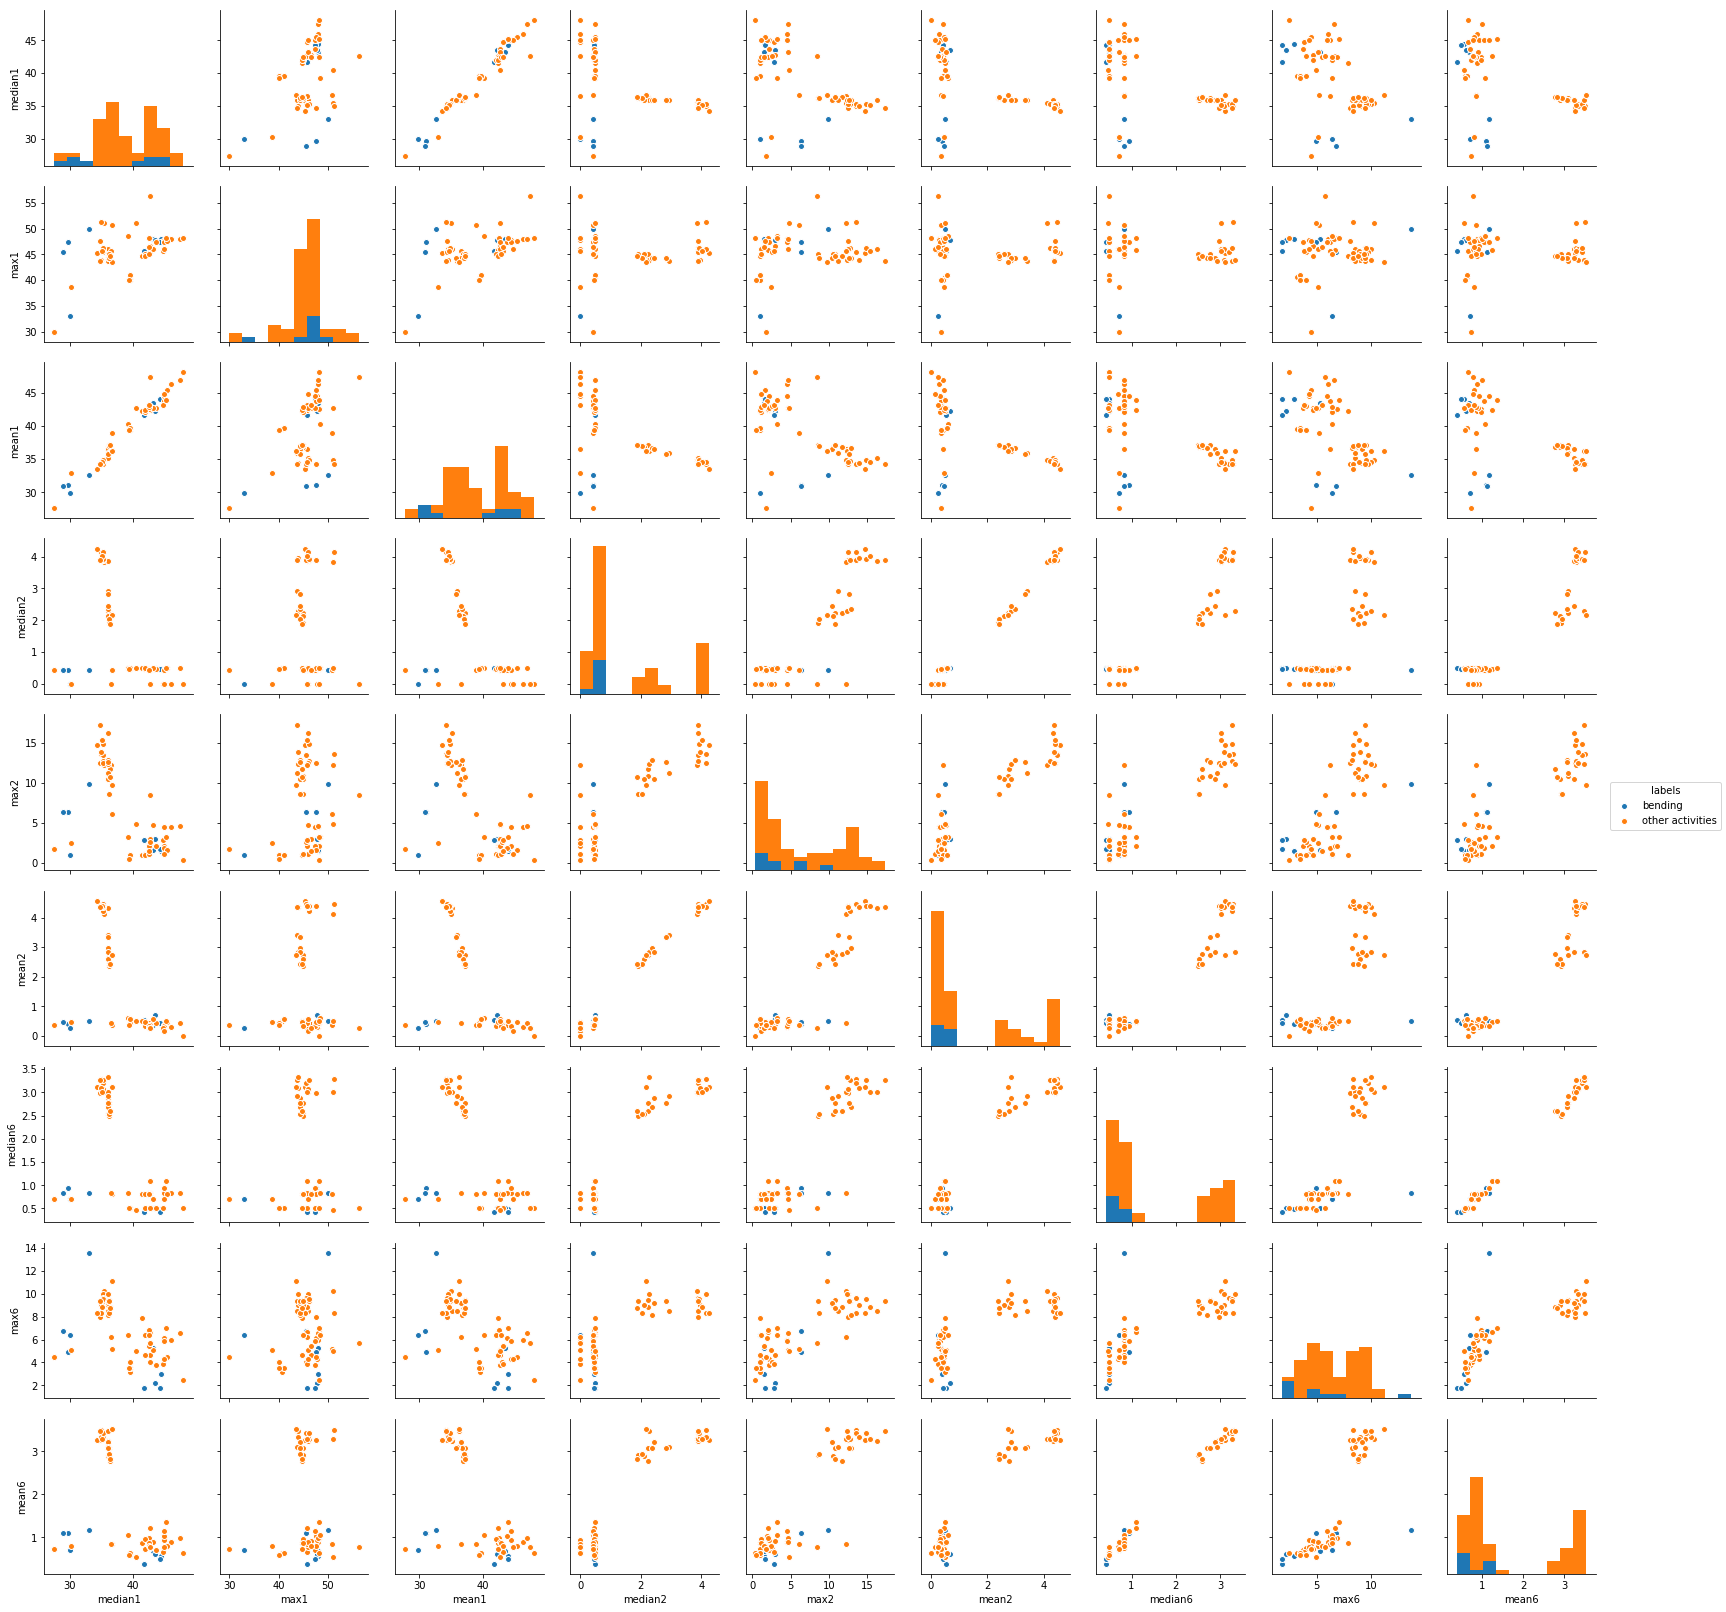

In [4]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

feature_table, train_data_with_label, test_data_with_label=train_test_split(1, 1)
data_to_classify = train_data_with_label[['median1', 'max1', 'mean1', 'median2', 'max2', 'mean2', 'median6', 'max6', 'mean6', 'labels']]

for i in range(69):
    if data_to_classify.loc[i, 'labels'] != 'bending1' and data_to_classify.loc[i, 'labels'] != 'bending2':
        data_to_classify.loc[i, 'labels'] = 'other activities'
    else:
        data_to_classify.loc[i, 'labels'] = 'bending'

sns.pairplot(data_to_classify, hue = 'labels')

# (d) ii 
Break each time series in training set into two (approximately) equal length time series.
From the two pairplots, we can see that after breaking time series, the data points become a little sparser.

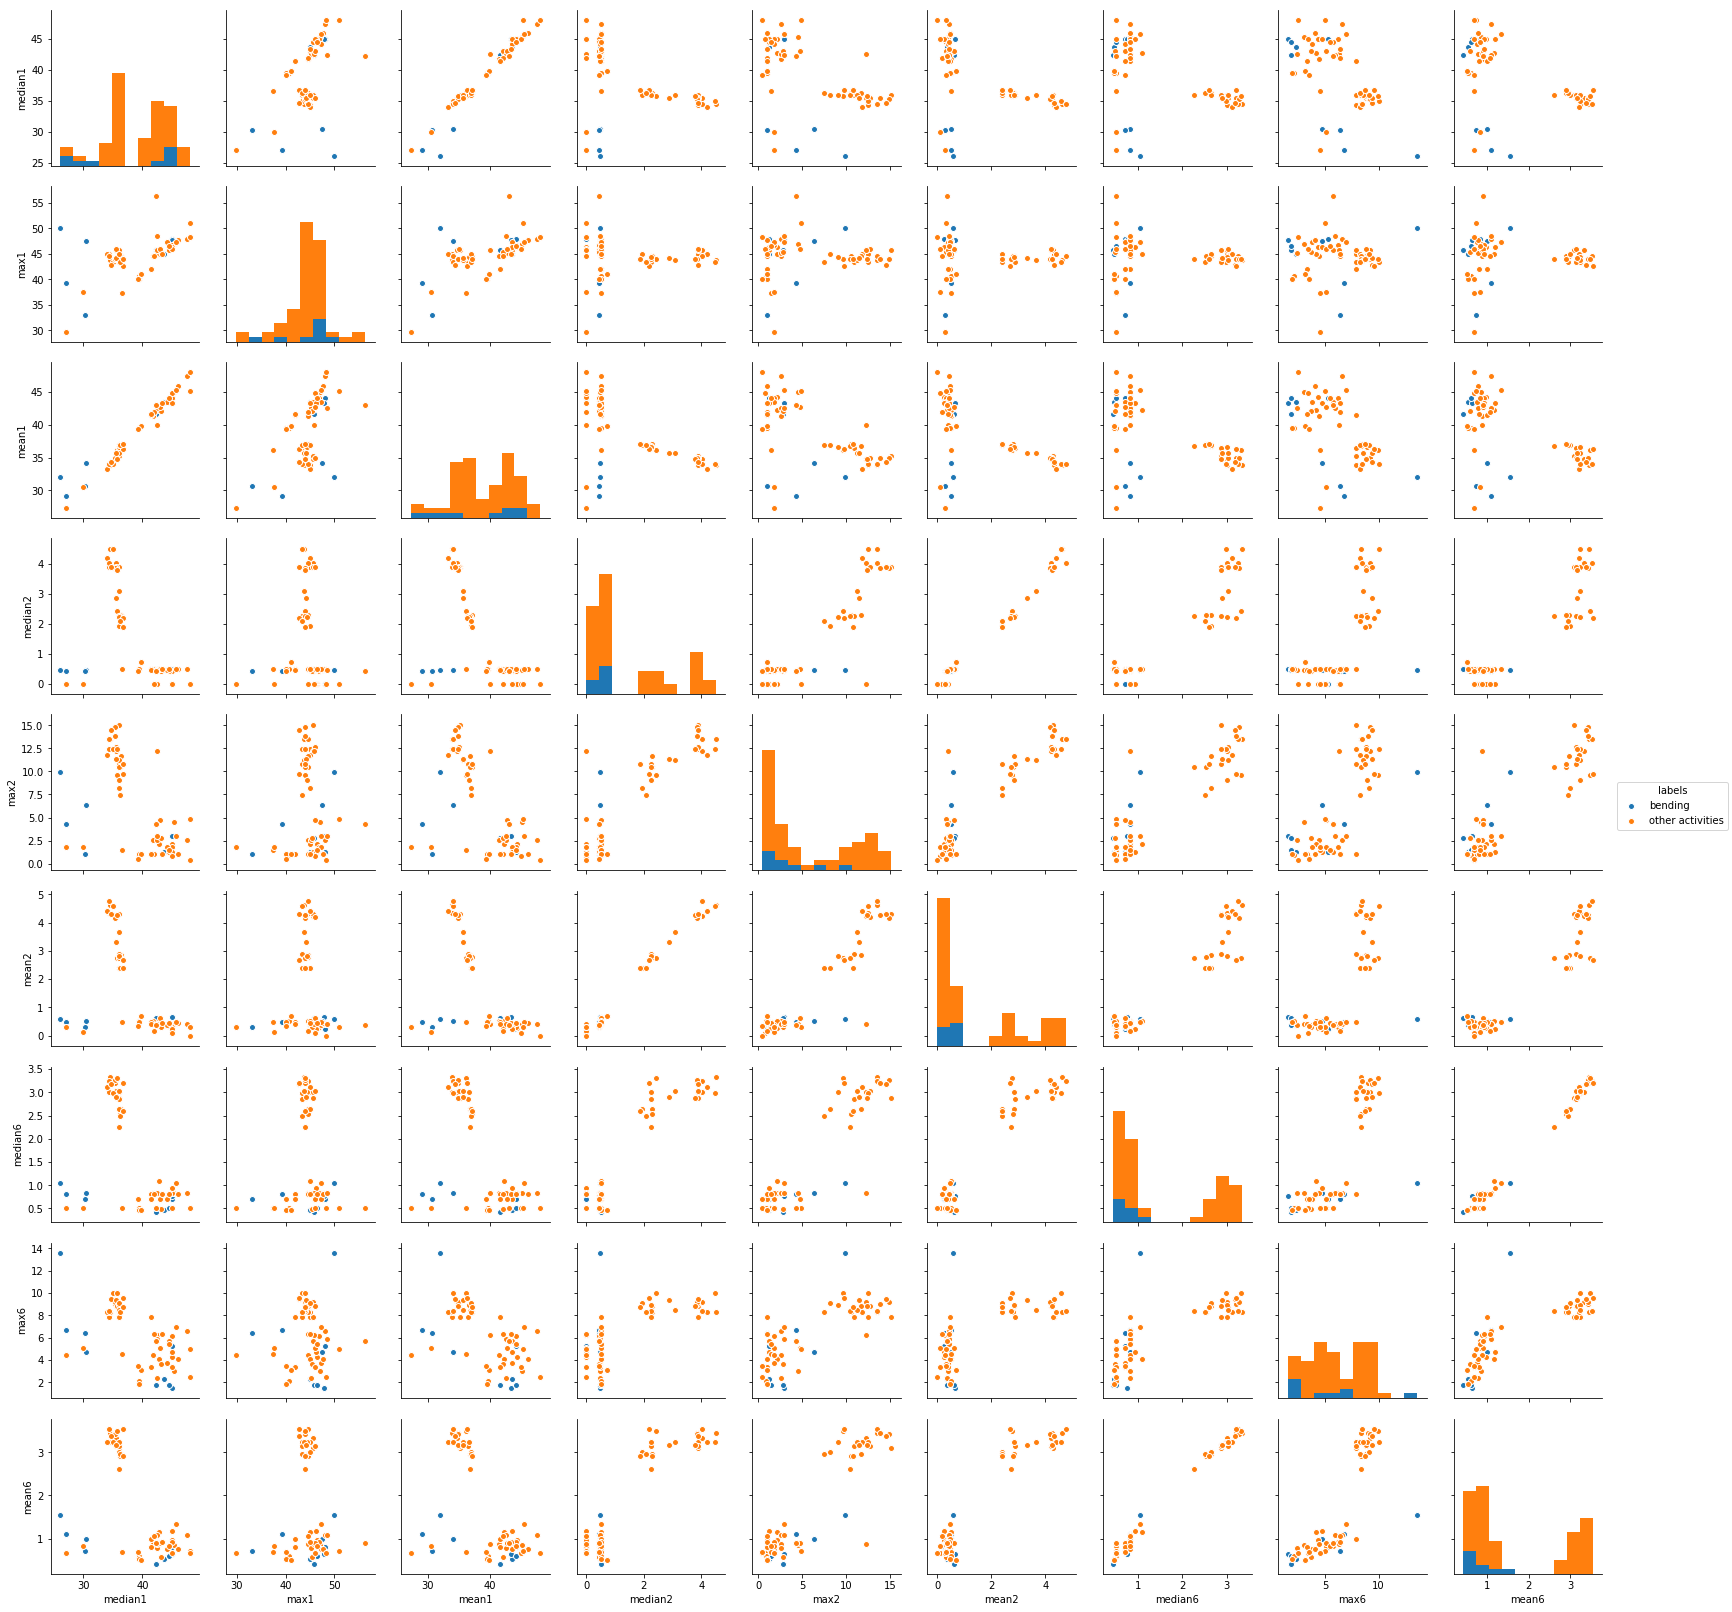

In [4]:
import warnings
warnings.filterwarnings('ignore')
feature_table, train_data_with_label, test_data_with_label=train_test_split(2, 1)
data_to_classify = train_data_with_label[['median1', 'max1', 'mean1', 'median2', 'max2', 'mean2', 'median6', 'max6', 'mean6', 'labels']]

for i in range(69):
    if data_to_classify.loc[i, 'labels'] != 'bending1' and data_to_classify.loc[i, 'labels'] != 'bending2':
        data_to_classify.loc[i, 'labels'] = 'other activities'
    else:
        data_to_classify.loc[i, 'labels'] = 'bending'

sns.pairplot(data_to_classify, hue = 'labels')

# (d) iii
I think the right way to perform cross-validation in this problem is to apply cross-validation each time when a K-1 fold is selected to select features first, using RFECV, note that this should be inside the cross-validation loop to select the best l. Then apply cross-validation to the logistic regression to select the best l in this problem using cross_validate.

Stratification is the process of rearranging the data as to ensure each fold is a good representative of the whole. In stratified k-fold cross-validation, the folds are selected so that the mean response value is approximately equal in all the folds. In the case of a binary classification, this means that each fold contains roughly the same proportions of the two types of class labels. Stratification is generally a better scheme, both in terms of bias and variance, when compared to regular cross-validation.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
# calculate average function
def cal_avg(num):
    return sum(num) / len(num)
cv_avg_score = []
l_range = range(1, 21)
# Use logistic regression and 5-fold cross validation to determine best l
for l in l_range:
    feature_table, train_data_with_label, test_data_with_label=train_test_split(l, 1)
    feature_title = []
    for k in range(6*l):
        feature_title.append('median'+str(k+1))
        feature_title.append('max'+str(k+1))
        feature_title.append('mean'+str(k+1))
    feature_title.append('labels')
    train_data_with_label=train_data_with_label[feature_title]
    for i in range(69):
        if train_data_with_label.loc[i, 'labels'] != 'bending1' and train_data_with_label.loc[i, 'labels'] != 'bending2':
            train_data_with_label.loc[i, 'labels'] = 1
        else:
            train_data_with_label.loc[i, 'labels'] = 0
       
    train_data = train_data_with_label.iloc[:,0:-1]
    train_label = train_data_with_label.iloc[:,-1]
    print('l = %d:' % l)
    lgr = LogisticRegression(C=1e5, random_state=0)
    # Use rfecv to select features
    rfecv = RFECV(estimator=lgr, cv=5)
    # Use 5-fold cross validation
    cv_results = cross_validate(rfecv, train_data, train_label, cv=5)
    cv_test_score = cv_results['test_score']
    print(cv_test_score)
    cv_avg_score.append(cal_avg(cv_test_score))
    print('The average accuracy is ', cal_avg(cv_test_score))
max_cv_score = max(cv_avg_score)
best_l = l_range[cv_avg_score.index(max_cv_score)]
print('The best value of l is %d' % best_l)
print('The cross-validation score of the classifier is %.6f' % max_cv_score)

l = 1:
[0.85714286 1.         0.85714286 0.85714286 1.        ]
The average accuracy is  0.9142857142857143
l = 2:
[0.85714286 1.         0.85714286 0.5        1.        ]
The average accuracy is  0.8428571428571429
l = 3:
[0.85714286 1.         0.92857143 0.85714286 1.        ]
The average accuracy is  0.9285714285714285
l = 4:
[0.85714286 1.         0.92857143 0.85714286 1.        ]
The average accuracy is  0.9285714285714285
l = 5:
[0.85714286 1.         0.92857143 0.85714286 1.        ]
The average accuracy is  0.9285714285714285
l = 6:
[0.85714286 1.         0.85714286 0.85714286 1.        ]
The average accuracy is  0.9142857142857143
l = 7:
[0.85714286 1.         0.92857143 0.85714286 0.92307692]
The average accuracy is  0.9131868131868132
l = 8:
[0.85714286 1.         0.92857143 0.85714286 1.        ]
The average accuracy is  0.9285714285714285
l = 9:
[0.85714286 1.         0.92857143 0.85714286 1.        ]
The average accuracy is  0.9285714285714285
l = 10:
[0.85714286 1.      

# (d) iv. Report the confusion matrix and show the ROC and AUC

The confusion matrix of the classifier on train data is:
 [[ 9  0]
 [ 0 60]]
The AUC of the classifier is 1.000000


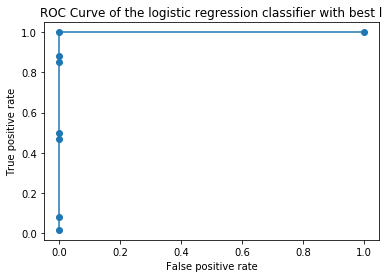

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
feature_table, train_data_with_label, test_data_with_label=train_test_split(best_l, 1)
feature_title = []
for k in range(6*best_l):
    feature_title.append('median'+str(k+1))
    feature_title.append('max'+str(k+1))
    feature_title.append('mean'+str(k+1))
feature_title.append('labels')
train_data_with_label=train_data_with_label[feature_title]
for i in range(69):
    if train_data_with_label.loc[i, 'labels'] != 'bending1' and train_data_with_label.loc[i, 'labels'] != 'bending2':
        train_data_with_label.loc[i, 'labels'] = 1
    else:
        train_data_with_label.loc[i, 'labels'] = 0

train_data = train_data_with_label.iloc[:,0:-1]
train_label = train_data_with_label.iloc[:,-1]

lgr = LogisticRegression(C=1e5, random_state=0)
# Use rfecv to select features
rfecv = RFECV(estimator=lgr, cv=StratifiedKFold(5)).fit(train_data, train_label)
pred_label = rfecv.predict(train_data)
print('The confusion matrix of the classifier on train data is:\n', confusion_matrix(train_label, pred_label))

# Plot ROC curve and calculate AUC of the classifier
fpr, tpr, thresholds = roc_curve(train_label, rfecv.decision_function(train_data))
print('The AUC of the classifier is %.6f' % auc(fpr, tpr))
plt.plot(fpr,tpr,marker = 'o')
plt.title('ROC Curve of the logistic regression classifier with best l')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# (d) iv. Report the parameters of your logistic regression βi’s as well as the p-values associated with them

In [7]:
from sklearn.feature_selection import f_regression

feature_selected_columns = train_data.columns[rfecv.support_]
feature_data = train_data.loc[:,feature_selected_columns]
print('The features we selected using logistic regression are:', feature_data.columns.values)
print('The parameters of the logistic regression βi’s are:', rfecv.estimator_.coef_)
f, p_values = f_regression(feature_data, train_label)
print('The p-values associated with each feature are:', p_values)

The features we selected using logistic regression are: ['max5' 'median11' 'mean11' 'median23' 'mean23' 'max37' 'max63']
The parameters of the logistic regression βi’s are: [[-0.74427178 -0.61433395 -0.74088777 -0.52262123 -0.60561446  1.32934828
   0.79898591]]
The p-values associated with each feature are: [6.62852891e-08 2.26040326e-13 7.30183589e-13 3.26433440e-10
 4.61798255e-10 7.03903081e-03 8.18707571e-01]


# (d) v. Test the classifier on the test set

The confusion matrix of the classifier on test set is:
 [[ 3  1]
 [ 0 15]]
The score on test set of the classifer is: 0.947368
The AUC of the classifier is 1.000000


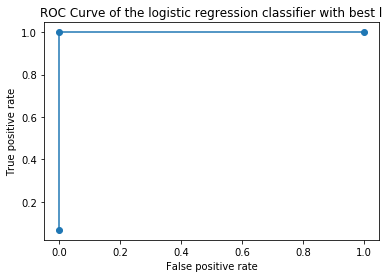

In [8]:
feature_table, train_data_with_label, test_data_with_label=train_test_split(best_l, best_l)
test_data_with_label=test_data_with_label[feature_title]

for j in range(19):
    if test_data_with_label.loc[j, 'labels'] != 'bending1' and test_data_with_label.loc[j, 'labels'] != 'bending2':
        test_data_with_label.loc[j, 'labels'] = 1
    else:
        test_data_with_label.loc[j, 'labels'] = 0

test_data = test_data_with_label.iloc[:,0:-1]
test_label = test_data_with_label.iloc[:,-1]

pred_label = rfecv.predict(test_data)
print('The confusion matrix of the classifier on test set is:\n', confusion_matrix(test_label, pred_label))
print('The score on test set of the classifer is: %.6f' % rfecv.score(test_data, test_label))
# Plot ROC curve and calculate AUC of the classifier
fpr, tpr, thresholds = roc_curve(test_label, rfecv.decision_function(test_data))
print('The AUC of the classifier is %.6f' % auc(fpr, tpr))
plt.plot(fpr,tpr,marker = 'o')
plt.title('ROC Curve of the logistic regression classifier with best l')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# The cross-validation accuracy is a little bit better than the accuracy on test set of the classifier. From the confusion matrix, we can see that no observations are misclassified using cross-validation. But 1 observation has been misclassified on the test set.

# (d) vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?
Answer: Yes

# (d) vii. Bauild a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.
We can see imbalanced classes from the confusion matrix, so we need to build case-control samping and parameter adjustment.

The confusion matrix of the classifier on train data is:
 [[60  0]
 [ 0 60]]
The AUC of the classifier is 1.000000


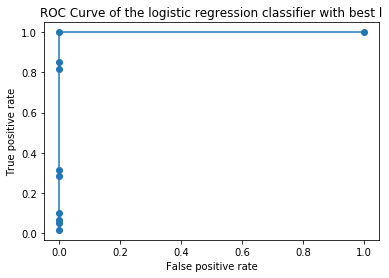

In [9]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_sample(train_data, train_label)

lgr = LogisticRegression(C=1e5, random_state=0)
rfecv = RFECV(estimator=lgr, cv=StratifiedKFold(5)).fit(X_res, y_res)
pred_label = rfecv.predict(X_res)
print('The confusion matrix of the classifier on train data is:\n', confusion_matrix(y_res, pred_label))

# Plot ROC curve and calculate AUC of the classifier
fpr, tpr, thresholds = roc_curve(train_label, rfecv.decision_function(train_data))
print('The AUC of the classifier is %.6f' % auc(fpr, tpr))
plt.plot(fpr,tpr,marker = 'o')
plt.title('ROC Curve of the logistic regression classifier with best l')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# (e) i. Repeat (d)iii using L1-penalized logistic regression

In [18]:
from liblinearutil import *
from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import normalize

acc = []
avg_acc = []
l_range = range(1, 21)
# Use logistic regression and 5-fold cross validation to determine best l
for l in l_range:
    feature_table, train_data_with_label, test_data_with_label=train_test_split(l, 1)
    feature_title = []
    for k in range(6*l):
        feature_title.append('median'+str(k+1))
        feature_title.append('max'+str(k+1))
        feature_title.append('mean'+str(k+1))
    feature_title.append('labels')
    train_data_with_label=train_data_with_label[feature_title]
    for i in range(69):
        if train_data_with_label.loc[i, 'labels'] != 'bending1' and train_data_with_label.loc[i, 'labels'] != 'bending2':
            train_data_with_label.loc[i, 'labels'] = 1
        else:
            train_data_with_label.loc[i, 'labels'] = 0
    
#     train_data = pd.DataFrame(normalize(train_data_with_label.iloc[:,0:-1]))
    train_data = train_data_with_label.iloc[:,0:-1]
    train_label = train_data_with_label.iloc[:,-1]
    
    x = train_data.values
    y = train_label.values
    print('l = %d:' % l)
    # Use 5-fold cross validation
    skf = StratifiedKFold(n_splits=5)
    for train_index, test_index in skf.split(train_data, train_label):
        m = train(y[train_index], x[train_index],'-s 6') # L1 logistic regression
        p_labels, p_acc, p_vals = predict(y[test_index], x[test_index], m)
        acc.append(p_acc[0])
    avg_acc.append(cal_avg(acc))
    print('The average accuracy is ', cal_avg(acc)/100)
best_acc = max(avg_acc)
best_l = l_range[avg_acc.index(best_acc)]
        
print('The best l of L1 penalized logistic regression model is %d' % best_l)
print('The accuracy of L1 penalized logistic regression model is ', best_acc/100)

l = 1:
Accuracy = 85.7143% (12/14) (classification)
Accuracy = 100% (14/14) (classification)
Accuracy = 92.8571% (13/14) (classification)
Accuracy = 78.5714% (11/14) (classification)
Accuracy = 92.3077% (12/13) (classification)
The average accuracy is  0.8989010989010988
l = 2:
Accuracy = 85.7143% (12/14) (classification)
Accuracy = 100% (14/14) (classification)
Accuracy = 85.7143% (12/14) (classification)
Accuracy = 92.8571% (13/14) (classification)
Accuracy = 100% (13/13) (classification)
The average accuracy is  0.9137362637362636
l = 3:
Accuracy = 85.7143% (12/14) (classification)
Accuracy = 100% (14/14) (classification)
Accuracy = 92.8571% (13/14) (classification)
Accuracy = 92.8571% (13/14) (classification)
Accuracy = 100% (13/13) (classification)
The average accuracy is  0.9234432234432234
l = 4:
Accuracy = 85.7143% (12/14) (classification)
Accuracy = 100% (14/14) (classification)
Accuracy = 92.8571% (13/14) (classification)
Accuracy = 92.8571% (13/14) (classification)
Accuracy 

# (e) ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?
Using p-values to select variables performs better than L1-penalized since we get higher accuracy. Actually, they perform almost the same. L1-penalized is easier to implement in this problem since it doesn't need to set the budget C.

# (f) i. Multi-class Classification

In [11]:
acc=[]
avg_acc=[]
for l in l_range:
    feature_table, train_data_with_label, test_data_with_label=train_test_split(l, 1)
    feature_title = []
    for k in range(6*l):
        feature_title.append('median'+str(k+1))
        feature_title.append('max'+str(k+1))
        feature_title.append('mean'+str(k+1))
    feature_title.append('labels')
    train_data_with_label=train_data_with_label[feature_title]
    for i in range(69):
        if train_data_with_label.loc[i, 'labels'] == 'bending1' or train_data_with_label.loc[i, 'labels'] == 'bending2':
            train_data_with_label.loc[i, 'labels'] = 0
        elif train_data_with_label.loc[i, 'labels'] == 'cycling':
            train_data_with_label.loc[i, 'labels'] = 1
        elif train_data_with_label.loc[i, 'labels'] == 'lying':
            train_data_with_label.loc[i, 'labels'] = 2
        elif train_data_with_label.loc[i, 'labels'] == 'sitting':
            train_data_with_label.loc[i, 'labels'] = 3
        elif train_data_with_label.loc[i, 'labels'] == 'standing':
            train_data_with_label.loc[i, 'labels'] = 4
        elif train_data_with_label.loc[i, 'labels'] == 'walking':
            train_data_with_label.loc[i, 'labels'] = 5
        else:
            print('Wrong label!')

    train_data = train_data_with_label.iloc[:,0:-1]
    train_label = train_data_with_label.iloc[:,-1]
    
    x = train_data.values
    y = train_label.values
    print('l = %d:' % l)
    # Use 5-fold cross validation to select best l
    skf = StratifiedKFold(n_splits=5)
    for train_index, test_index in skf.split(train_data, train_label):
        m = train(y[train_index], x[train_index],'-s 6') # L1 logistic regression
        p_labels, p_acc, p_vals = predict(y[test_index], x[test_index], m)
        acc.append(p_acc[0])
    avg_acc.append(cal_avg(acc)/100)
    print('The average accuracy is ', cal_avg(acc)/100)
best_acc = max(avg_acc)
best_l = l_range[avg_acc.index(best_acc)]
        
print('The best l of L1 penalized logistic regression model is %d' % best_l)
print('The test error is ', 1 - best_acc)

l = 1:
Accuracy = 82.3529% (14/17) (classification)
Accuracy = 82.3529% (14/17) (classification)
Accuracy = 75% (9/12) (classification)
Accuracy = 75% (9/12) (classification)
Accuracy = 72.7273% (8/11) (classification)
The average accuracy is  0.7748663101604278
l = 2:
Accuracy = 82.3529% (14/17) (classification)
Accuracy = 88.2353% (15/17) (classification)
Accuracy = 91.6667% (11/12) (classification)
Accuracy = 66.6667% (8/12) (classification)
Accuracy = 100% (11/11) (classification)
The average accuracy is  0.8163547237076648
l = 3:
Accuracy = 70.5882% (12/17) (classification)
Accuracy = 88.2353% (15/17) (classification)
Accuracy = 83.3333% (10/12) (classification)
Accuracy = 66.6667% (8/12) (classification)
Accuracy = 90.9091% (10/11) (classification)
The average accuracy is  0.8107248960190138
l = 4:
Accuracy = 82.3529% (14/17) (classification)
Accuracy = 100% (17/17) (classification)
Accuracy = 75% (9/12) (classification)
Accuracy = 83.3333% (10/12) (classification)
Accuracy = 81.

In [22]:
from sklearn.metrics import roc_curve, auc
acc=[]
avg_acc=[]

feature_table, train_data_with_label, test_data_with_label=train_test_split(best_l, 1)
feature_title = []
for k in range(6*best_l):
    feature_title.append('median'+str(k+1))
    feature_title.append('max'+str(k+1))
    feature_title.append('mean'+str(k+1))
feature_title.append('labels')
train_data_with_label=train_data_with_label[feature_title]
for i in range(69):
    if train_data_with_label.loc[i, 'labels'] == 'bending1' or train_data_with_label.loc[i, 'labels'] == 'bending2':
        train_data_with_label.loc[i, 'labels'] = 0
    elif train_data_with_label.loc[i, 'labels'] == 'cycling':
        train_data_with_label.loc[i, 'labels'] = 1
    elif train_data_with_label.loc[i, 'labels'] == 'lying':
        train_data_with_label.loc[i, 'labels'] = 2
    elif train_data_with_label.loc[i, 'labels'] == 'sitting':
        train_data_with_label.loc[i, 'labels'] = 3
    elif train_data_with_label.loc[i, 'labels'] == 'standing':
        train_data_with_label.loc[i, 'labels'] = 4
    elif train_data_with_label.loc[i, 'labels'] == 'walking':
        train_data_with_label.loc[i, 'labels'] = 5
    else:
        print('Wrong label!')

train_data = train_data_with_label.iloc[:,0:-1]
train_label = train_data_with_label.iloc[:,-1]

x = train_data.values
y = train_label.values

m = train(y, x,'-s 6') # L1 logistic regression
p_labels, p_acc, p_vals = predict(y, x, m)
print('Confusion matrix for multiclass classification is: \n', confusion_matrix(y, p_labels))

y_test = label_binarize(test_data, labels=[0,1,2,3,4,5])
n_classes = y_test.shape[1]
p_vals=np.array(p_vals)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], p_vals[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

colors = ['aqua', 'darkorange', 'cornflowerblue','yellow','red','green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0}(area = {1:0.2f})'.format(i, roc_auc[i]))
plt.legend(loc="lower right")

Accuracy = 100% (69/69) (classification)
Confusion matrix for multiclass classification is: 
 [[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


# confusion matrices and ROC curves defined for multiclass classification:
consider one class among the multiclass as the positive class and others as negative. Then calculate true positive rate and false negative rate for each one. All the classes should be considered as positive once. Then we can get a N * N confusion matrix where N is the number of classes and N ROC curves.

# (f) ii. Gaussian Naive Bayes’ classifier

In [12]:
from sklearn.naive_bayes import GaussianNB
cv_avg_score = []
for l in l_range:
    feature_table, train_data_with_label, test_data_with_label=train_test_split(l, 1)
    feature_title = []
    for k in range(6*l):
        feature_title.append('median'+str(k+1))
        feature_title.append('max'+str(k+1))
        feature_title.append('mean'+str(k+1))
    feature_title.append('labels')
    train_data_with_label=train_data_with_label[feature_title]
    for i in range(69):
        if train_data_with_label.loc[i, 'labels'] == 'bending1' or train_data_with_label.loc[i, 'labels'] == 'bending2':
            train_data_with_label.loc[i, 'labels'] = 0
        elif train_data_with_label.loc[i, 'labels'] == 'cycling':
            train_data_with_label.loc[i, 'labels'] = 1
        elif train_data_with_label.loc[i, 'labels'] == 'lying':
            train_data_with_label.loc[i, 'labels'] = 2
        elif train_data_with_label.loc[i, 'labels'] == 'sitting':
            train_data_with_label.loc[i, 'labels'] = 3
        elif train_data_with_label.loc[i, 'labels'] == 'standing':
            train_data_with_label.loc[i, 'labels'] = 4
        elif train_data_with_label.loc[i, 'labels'] == 'walking':
            train_data_with_label.loc[i, 'labels'] = 5
        else:
            print('Wrong label!')

    train_data = train_data_with_label.iloc[:,0:-1]
    train_label = train_data_with_label.iloc[:,-1]
    
    print('l = %d:' % l)

#     # Use 5-fold cross validation to select best l
#     skf = StratifiedKFold(n_splits=5)
#     for train_index, test_index in skf.split(train_data, train_label):
#         gau = GaussianNB().fit(train_data.iloc[train_index,:], train_label.iloc[train_index,0])
#         acc.append(gau.score(train_data.iloc[test_index,:], train_label.iloc[test_index,0]))
#     avg_acc.append(cal_avg(acc))
#     print('The average accuracy is ', cal_avg(acc))
    gau = GaussianNB()
    cv_results = cross_validate(gau, train_data, train_label, cv=5)
    cv_test_score = cv_results['test_score']
    print(cv_test_score)
    cv_avg_score.append(cal_avg(cv_test_score))
    print('The average accuracy is ', cal_avg(cv_test_score))
max_cv_score = max(cv_avg_score)
best_l = l_range[cv_avg_score.index(max_cv_score)]
print('The best value of l is %d' % best_l)
print('The cross-validation accuracy of the Gaussian Naive Bayes classifier is %.6f' % max_cv_score)
print('The test error is ', 1 - max_cv_score)
# best_acc = max(avg_acc)
# best_l = l_range[avg_acc.index(best_acc)]
# print('The best l of L1 penalized logistic regression model is %d' % best_l)

l = 1:
[0.88235294 0.76470588 0.83333333 0.83333333 0.81818182]
The average accuracy is  0.8263814616755794
l = 2:
[0.82352941 0.76470588 0.91666667 0.75       0.72727273]
The average accuracy is  0.7964349376114083
l = 3:
[0.64705882 0.76470588 1.         0.75       0.81818182]
The average accuracy is  0.7959893048128343
l = 4:
[0.58823529 0.76470588 0.91666667 0.75       0.81818182]
The average accuracy is  0.7675579322638146
l = 5:
[0.58823529 0.88235294 0.91666667 0.83333333 0.72727273]
The average accuracy is  0.7895721925133691
l = 6:
[0.64705882 0.82352941 0.91666667 0.75       0.72727273]
The average accuracy is  0.7729055258467022
l = 7:
[0.64705882 0.82352941 0.83333333 0.75       0.72727273]
The average accuracy is  0.7562388591800356
l = 8:
[0.64705882 0.94117647 0.83333333 0.75       0.72727273]
The average accuracy is  0.7797682709447417
l = 9:
[0.70588235 0.88235294 0.91666667 0.83333333 0.72727273]
The average accuracy is  0.8131016042780749
l = 10:
[0.76470588 0.882352

# (f) ii. Multinomial Naive Bayes classifier

In [13]:
from sklearn.naive_bayes import MultinomialNB

cv_avg_score = []
for l in l_range:
    feature_table, train_data_with_label, test_data_with_label=train_test_split(l, 1)
    feature_title = []
    for k in range(6*l):
        feature_title.append('median'+str(k+1))
        feature_title.append('max'+str(k+1))
        feature_title.append('mean'+str(k+1))
    feature_title.append('labels')
    train_data_with_label=train_data_with_label[feature_title]
    for i in range(69):
        if train_data_with_label.loc[i, 'labels'] == 'bending1' or train_data_with_label.loc[i, 'labels'] == 'bending2':
            train_data_with_label.loc[i, 'labels'] = 0
        elif train_data_with_label.loc[i, 'labels'] == 'cycling':
            train_data_with_label.loc[i, 'labels'] = 1
        elif train_data_with_label.loc[i, 'labels'] == 'lying':
            train_data_with_label.loc[i, 'labels'] = 2
        elif train_data_with_label.loc[i, 'labels'] == 'sitting':
            train_data_with_label.loc[i, 'labels'] = 3
        elif train_data_with_label.loc[i, 'labels'] == 'standing':
            train_data_with_label.loc[i, 'labels'] = 4
        elif train_data_with_label.loc[i, 'labels'] == 'walking':
            train_data_with_label.loc[i, 'labels'] = 5
        else:
            print('Wrong label!')

    train_data = train_data_with_label.iloc[:,0:-1]
    train_label = train_data_with_label.iloc[:,-1]
    
    print('l = %d:' % l)

#     # Use 5-fold cross validation to select best l
    mnb = MultinomialNB()
    cv_results = cross_validate(mnb, train_data, train_label, cv=5)
    cv_test_score = cv_results['test_score']
    print(cv_test_score)
    cv_avg_score.append(cal_avg(cv_test_score))
    print('The average accuracy is ', cal_avg(cv_test_score))
max_cv_score = max(cv_avg_score)
best_l = l_range[cv_avg_score.index(max_cv_score)]
print('The best value of l is %d' % best_l)
print('The cross-validation accuracy of the multinomial Naive Bayes classifier is %.6f' % max_cv_score)
print('The test error is ', 1 - max_cv_score)

l = 1:
[0.88235294 0.82352941 0.75       0.83333333 0.72727273]
The average accuracy is  0.8032976827094475
l = 2:
[0.82352941 0.88235294 0.75       0.75       0.90909091]
The average accuracy is  0.8229946524064171
l = 3:
[0.82352941 0.88235294 0.75       0.83333333 1.        ]
The average accuracy is  0.8578431372549019
l = 4:
[0.88235294 0.88235294 0.66666667 0.75       1.        ]
The average accuracy is  0.8362745098039216
l = 5:
[0.88235294 0.88235294 0.75       0.75       0.81818182]
The average accuracy is  0.8165775401069519
l = 6:
[0.88235294 0.88235294 0.66666667 0.83333333 1.        ]
The average accuracy is  0.8529411764705882
l = 7:
[0.88235294 0.88235294 0.75       0.83333333 1.        ]
The average accuracy is  0.8696078431372548
l = 8:
[0.94117647 0.82352941 0.66666667 0.66666667 1.        ]
The average accuracy is  0.8196078431372549
l = 9:
[0.94117647 0.94117647 0.75       0.91666667 1.        ]
The average accuracy is  0.9098039215686274
l = 10:
[0.88235294 0.941176

# (f) iii. According to the accuracy of the two models we obtained, multinomial Naive Bayes is better for multi-class classification in this problem.